# **Python Instalation**

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# **Exploratory Data Analysis (EDA)**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel('revenue.xlsx')

In [ ]:
print(data.head())

   Bulan       Tanggal Bayar  ID Pelanggan Layanan Provider  \
0      1 2023-02-02 09:45:00  151000510898          10 MBPS   
1      1 2023-01-16 15:46:00  151000511358          20 MBPS   
2      1 2023-01-11 16:52:00  151000512634          20 MBPS   
3      1 2023-01-21 17:32:00  151000517458          20 MBPS   
4      1 2023-01-28 05:03:00  151000536697          20 MBPS   

      Nama Pelanggan  Tagihan     ULP         UP3 Provinsi  
0    I KETUT SUMERTA   140000  Negara  Bali Utara     BALI  
1    I GEDE DARMAWAN   188000  Bangli  Bali Timur     BALI  
2    I WAYAN MUSTIKA   188000  Bangli  Bali Timur     BALI  
3  I NENGAH SURYAWAN   212000  Bangli  Bali Timur     BALI  
4  I WAYAN MAHARDIKA   212000  Bangli  Bali Timur     BALI  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Bulan             8199 non-null   int64         
 1   Tanggal Bayar     8199 non-null   datetime64[ns]
 2   ID Pelanggan      8199 non-null   int64         
 3   Layanan Provider  8199 non-null   object        
 4   Nama Pelanggan    8199 non-null   object        
 5   Tagihan           8199 non-null   int64         
 6   ULP               8199 non-null   object        
 7   UP3               8199 non-null   object        
 8   Provinsi          8199 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 576.6+ KB
None


In [ ]:
data = data.drop(['Bulan', 'ID Pelanggan', 'Nama Pelanggan'],axis=1)

In [ ]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Mengubah kolom-kolom kategorikal menjadi numerik
categorical_columns = ['ULP', 'UP3', 'Provinsi']
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Atau menggunakan One-Hot Encoding jika diperlukan
data_encoded = pd.get_dummies(data, columns=categorical_columns)

print(data.head())
print(data_encoded.head())

        Tanggal Bayar Layanan Provider  Tagihan  ULP  UP3  Provinsi
0 2023-02-02 09:45:00          10 MBPS   140000   11    2         0
1 2023-01-16 15:46:00          20 MBPS   188000    1    1         0
2 2023-01-11 16:52:00          20 MBPS   188000    1    1         0
3 2023-01-21 17:32:00          20 MBPS   212000    1    1         0
4 2023-01-28 05:03:00          20 MBPS   212000    1    1         0
        Tanggal Bayar Layanan Provider  Tagihan  ULP_0  ULP_1  ULP_2  ULP_3  \
0 2023-02-02 09:45:00          10 MBPS   140000  False  False  False  False   
1 2023-01-16 15:46:00          20 MBPS   188000  False   True  False  False   
2 2023-01-11 16:52:00          20 MBPS   188000  False   True  False  False   
3 2023-01-21 17:32:00          20 MBPS   212000  False   True  False  False   
4 2023-01-28 05:03:00          20 MBPS   212000  False   True  False  False   

   ULP_4  ULP_5  ULP_6  ...  ULP_20  ULP_21  UP3_0  UP3_1  UP3_2  UP3_3  \
0  False  False  False  ...   False   Fals

In [ ]:
print(data[['ULP', 'UP3', 'Provinsi']].head(10))

   ULP  UP3  Provinsi
0   11    2         0
1    1    1         0
2    1    1         0
3    1    1         0
4    1    1         0
5    6    1         0
6    5    2         0
7    4    1         0
8    1    1         0
9    1    1         0


In [ ]:
# Membersihkan kolom 'Layanan Provider' dengan menghapus teks
data['Layanan Provider'] = data['Layanan Provider'].str.replace(' MBPS', '')
data['Layanan Provider'] = pd.to_numeric(data['Layanan Provider'], errors='coerce')

# Mengisi nilai NaN yang mungkin muncul setelah konversi
data['Layanan Provider'].fillna(data['Layanan Provider'].mean(), inplace=True)

print(data['Layanan Provider'].head(10))

0    10
1    20
2    20
3    20
4    20
5    10
6    20
7    20
8    10
9    20
Name: Layanan Provider, dtype: int64


In [ ]:
# Konversi kolom Tanggal Bayar ke tipe data datetime64
data['Tanggal Bayar'] = pd.to_datetime(data['Tanggal Bayar'])

# Ekstraksi fitur-fitur tanggal dan tambahkan ke DataFrame yang sudah ada
data = data.assign(
    Tahun=data['Tanggal Bayar'].dt.year,
    Bulan=data['Tanggal Bayar'].dt.month,
    Hari=data['Tanggal Bayar'].dt.day
)

data = data.drop(columns=['Tanggal Bayar'])

print(data.head(10))

   Layanan Provider  Tagihan  ULP  UP3  Provinsi  Tahun  Bulan  Hari
0                10   140000   11    2         0   2023      2     2
1                20   188000    1    1         0   2023      1    16
2                20   188000    1    1         0   2023      1    11
3                20   212000    1    1         0   2023      1    21
4                20   212000    1    1         0   2023      1    28
5                10   140000    6    1         0   2023      1    16
6                20   188000    5    2         0   2023      1    22
7                20   212000    4    1         0   2023      2     6
8                10   140000    1    1         0   2023      1    10
9                20   212000    1    1         0   2023      1    23


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Layanan Provider  8199 non-null   int64
 1   Tagihan           8199 non-null   int64
 2   ULP               8199 non-null   int64
 3   UP3               8199 non-null   int64
 4   Provinsi          8199 non-null   int64
 5   Tahun             8199 non-null   int32
 6   Bulan             8199 non-null   int32
 7   Hari              8199 non-null   int32
dtypes: int32(3), int64(5)
memory usage: 416.5 KB
None


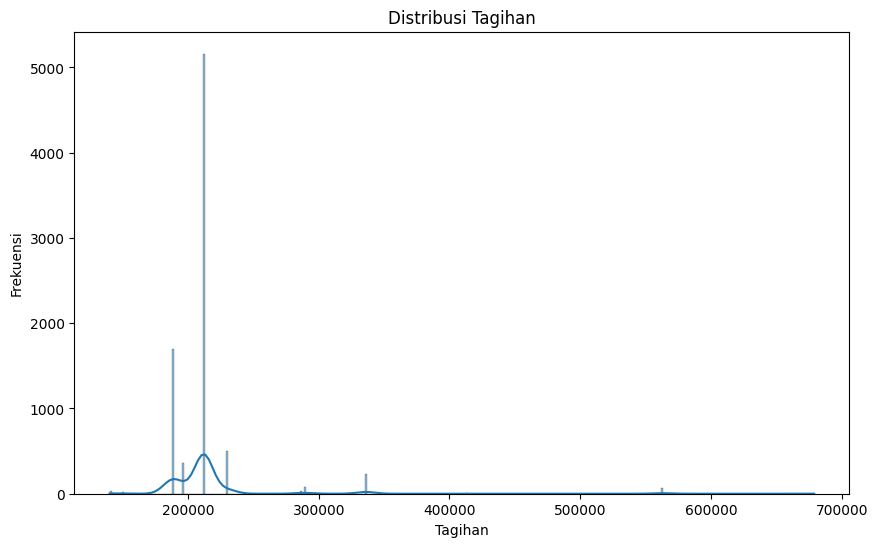

In [ ]:
# Visualisasi distribusi data pada kolom 'Tagihan'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Tagihan'], kde=True)
plt.title('Distribusi Tagihan')
plt.xlabel('Tagihan')
plt.ylabel('Frekuensi')
plt.show()

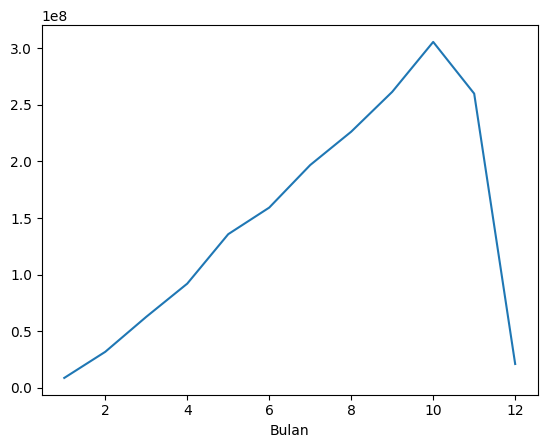

In [ ]:
#Visualisasi Time Series
data.groupby('Bulan')['Tagihan'].sum().plot()
plt.show()

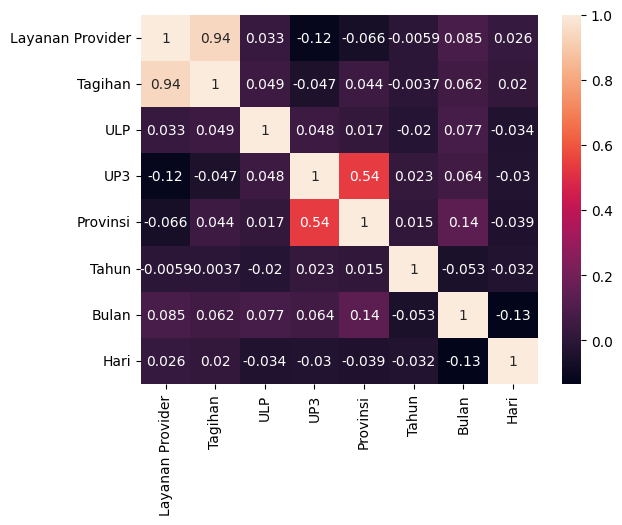

In [ ]:
#Visualisasi Korelasi dengan Heatmap
import seaborn as sns

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# **Validation Model**

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Tagihan'])
y = data['Tagihan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Jumlah baris data fitur (X):", X.shape[0])
print("Jumlah baris data target (y):", y.shape[0])

print("Jumlah baris data latih (X_train, y_train):", X_train.shape[0])
print("Jumlah baris data uji (X_test, y_test):", X_test.shape[0])

Jumlah baris data fitur (X): 8199
Jumlah baris data target (y): 8199
Jumlah baris data latih (X_train, y_train): 6559
Jumlah baris data uji (X_test, y_test): 1640


In [ ]:
# Cross-Validation : Menggunakan K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score

model = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation Scores: {-scores}')
print(f'Mean Cross-Validation Score: {-scores.mean()}')

Cross-Validation Scores: [1.00808859e+08 1.16880081e+07 2.16393347e+07 4.92263415e+06
 2.09311911e+07]
Mean Cross-Validation Score: 31998005.429809637


In [ ]:
# Hyperparameter Tuning : Grid Search atau Random Search
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Ubah kembali ke nilai positif

print(f'Best Parameters: {best_params}')
print(f'Best Mean Squared Error: {best_score}')

Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
Best Mean Squared Error: 21079881.09585406


# **Modeling Decision Tree - Training Hyperparameter**

**1.   Percobaan A - Default Hyperparameters**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

model_a = DecisionTreeRegressor(random_state=42)
model_a.fit(X_train, y_train)

y_train_pred_a = model_a.predict(X_train)
y_test_pred_a = model_a.predict(X_test)

train_mse_a = mean_squared_error(y_train, y_train_pred_a)
validation_mse_a = mean_squared_error(y_test, y_test_pred_a)

print(f'Mean Squared Error (Percobaan A - Training): {train_mse_a}')
print(f'Mean Squared Error (Percobaan A - Validation): {validation_mse_a}')

Mean Squared Error (Percobaan A - Training): 2322584.74360929
Mean Squared Error (Percobaan A - Validation): 39898415.31165312


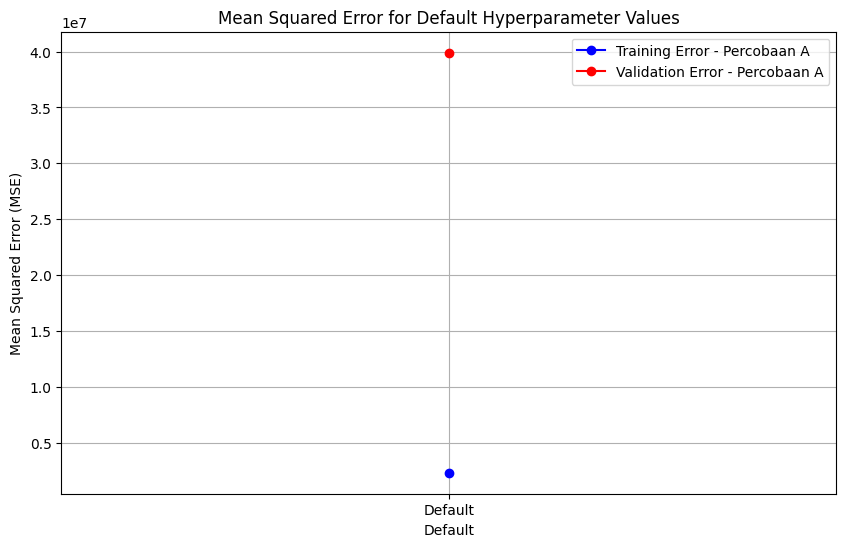

In [ ]:
# Convert None to string for plotting
depth_values_str = ['None' if v is None else str(v) for v in depth_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(['Default'], [train_mse_a], marker='o', linestyle='-', color='b', label='Training Error - Percobaan A')
plt.plot(['Default'], [validation_mse_a], marker='o', linestyle='-', color='r', label='Validation Error - Percobaan A')
plt.xlabel('Default')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error for Default Hyperparameter Values')
plt.legend()
plt.grid(True)
plt.show()

**2. Percobaan B - Depth Tuning**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_mse_results = []
validation_mse_results = []

depth_values = [3, 5, 7, 10, None]

for depth in depth_values:
    model_b = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model_b.fit(X_train, y_train)

    y_train_pred_b = model_b.predict(X_train)
    y_test_pred_b = model_b.predict(X_test)

    train_mse_b = mean_squared_error(y_train, y_train_pred_b)
    validation_mse_b = mean_squared_error(y_test, y_test_pred_b)

    train_mse_results.append(train_mse_b)
    validation_mse_results.append(validation_mse_b)

    print(f'Mean Squared Error (Training, max_depth={depth}): {train_mse_b}')
    print(f'Mean Squared Error (Validation, max_depth={depth}): {validation_mse_b}')

Mean Squared Error (Training, max_depth=3): 49597407.0019058
Mean Squared Error (Validation, max_depth=3): 68340293.076332
Mean Squared Error (Training, max_depth=5): 15358479.658656478
Mean Squared Error (Validation, max_depth=5): 28705852.982778423
Mean Squared Error (Training, max_depth=7): 11126528.660028983
Mean Squared Error (Validation, max_depth=7): 25090338.281144995
Mean Squared Error (Training, max_depth=10): 6772704.622814368
Mean Squared Error (Validation, max_depth=10): 34109493.10760157
Mean Squared Error (Training, max_depth=None): 2322584.74360929
Mean Squared Error (Validation, max_depth=None): 39898415.31165312


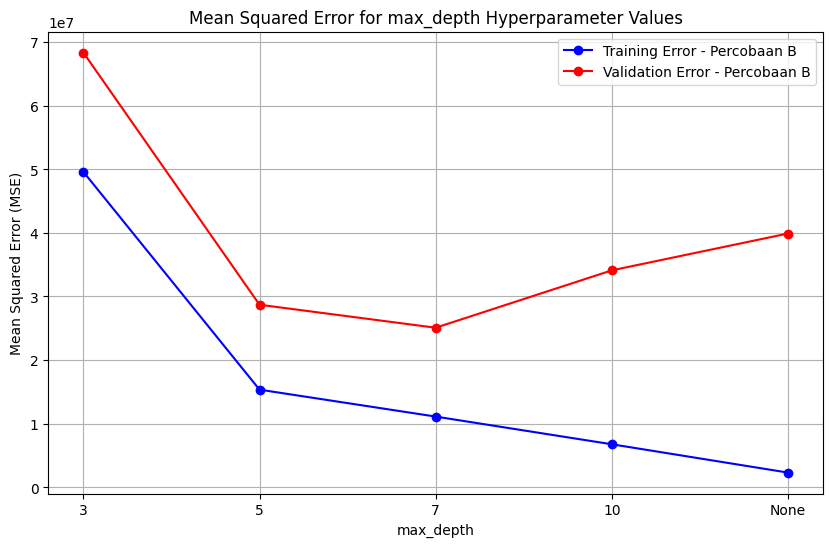

In [ ]:
# Convert None to string for plotting
depth_values_str = ['None' if v is None else str(v) for v in depth_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depth_values_str, train_mse_results, marker='o', linestyle='-', color='b', label='Training Error - Percobaan B')
plt.plot(depth_values_str, validation_mse_results, marker='o', linestyle='-', color='r', label='Validation Error - Percobaan B')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error for max_depth Hyperparameter Values')
plt.legend()
plt.grid(True)
plt.show()

**3. Percobaan C - Minimum Samples Split**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_mse_results_c = []
validation_mse_results_c = []

split_values = [2, 5, 10, 20]

for split in split_values:
    model_c = DecisionTreeRegressor(min_samples_split=split, random_state=42)
    model_c.fit(X_train, y_train)

    y_train_pred_c = model_c.predict(X_train)
    y_test_pred_c = model_c.predict(X_test)

    train_mse_c = mean_squared_error(y_train, y_train_pred_c)
    validation_mse_c = mean_squared_error(y_test, y_test_pred_c)

    train_mse_results_c.append(train_mse_c)
    validation_mse_results_c.append(validation_mse_c)

    print(f'Mean Squared Error (Percobaan C, min_samples_split={split} - Training): {train_mse_c}')
    print(f'Mean Squared Error (Percobaan C, min_samples_split={split} - Validation): {validation_mse_c}')

Mean Squared Error (Percobaan C, min_samples_split=2 - Training): 2322584.74360929
Mean Squared Error (Percobaan C, min_samples_split=2 - Validation): 39898415.31165312
Mean Squared Error (Percobaan C, min_samples_split=5 - Training): 6315901.814300961
Mean Squared Error (Percobaan C, min_samples_split=5 - Validation): 29684429.031165313
Mean Squared Error (Percobaan C, min_samples_split=10 - Training): 8562174.1724082
Mean Squared Error (Percobaan C, min_samples_split=10 - Validation): 25342004.4025458
Mean Squared Error (Percobaan C, min_samples_split=20 - Training): 13177844.761153182
Mean Squared Error (Percobaan C, min_samples_split=20 - Validation): 26198813.988135856


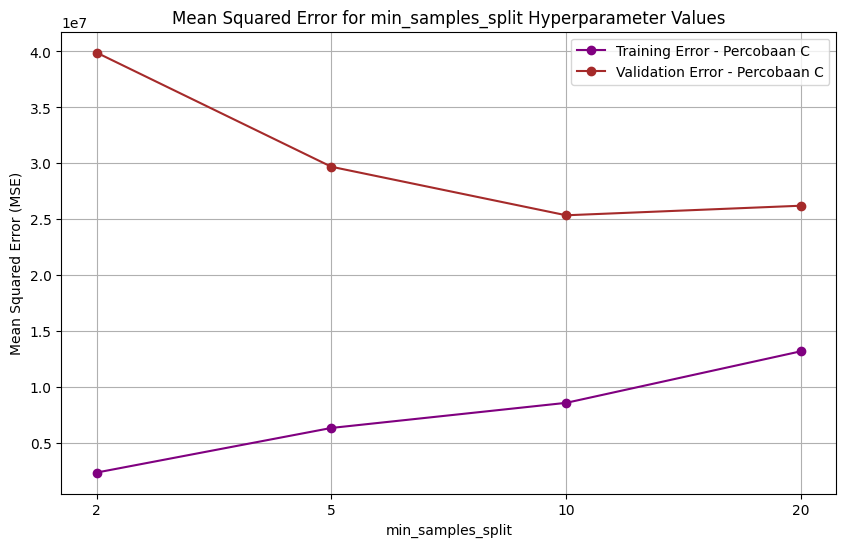

In [ ]:
# Convert None to string for plotting
split_values_str = [str(v) for v in split_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(split_values_str, train_mse_results_c, marker='o', linestyle='-', color='purple', label='Training Error - Percobaan C')
plt.plot(split_values_str, validation_mse_results_c, marker='o', linestyle='-', color='brown', label='Validation Error - Percobaan C')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error for min_samples_split Hyperparameter Values')
plt.legend()
plt.grid(True)
plt.show()

**4. Percobaan D - Minimum Samples Leaf**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_mse_results_d = []
validation_mse_results_d = []

leaf_values = [1, 2, 5, 10]

for leaf in leaf_values:
    model_d = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model_d.fit(X_train, y_train)

    y_train_pred_d = model_d.predict(X_train)
    y_test_pred_d = model_d.predict(X_test)

    train_mse_d = mean_squared_error(y_train, y_train_pred_d)
    validation_mse_d = mean_squared_error(y_test, y_test_pred_d)

    train_mse_results_d.append(train_mse_d)
    validation_mse_results_d.append(validation_mse_d)

    print(f'Mean Squared Error (Percobaan D, min_samples_leaf={leaf} - Training): {train_mse_d}')
    print(f'Mean Squared Error (Percobaan D, min_samples_leaf={leaf} - Validation): {validation_mse_d}')

Mean Squared Error (Percobaan D, min_samples_leaf=1 - Training): 2322584.74360929
Mean Squared Error (Percobaan D, min_samples_leaf=1 - Validation): 39898415.31165312
Mean Squared Error (Percobaan D, min_samples_leaf=2 - Training): 9115390.702705842
Mean Squared Error (Percobaan D, min_samples_leaf=2 - Validation): 39743080.34677286
Mean Squared Error (Percobaan D, min_samples_leaf=5 - Training): 14390355.403181292
Mean Squared Error (Percobaan D, min_samples_leaf=5 - Validation): 37517564.0612931
Mean Squared Error (Percobaan D, min_samples_leaf=10 - Training): 22016895.47700106
Mean Squared Error (Percobaan D, min_samples_leaf=10 - Validation): 34577695.97616616


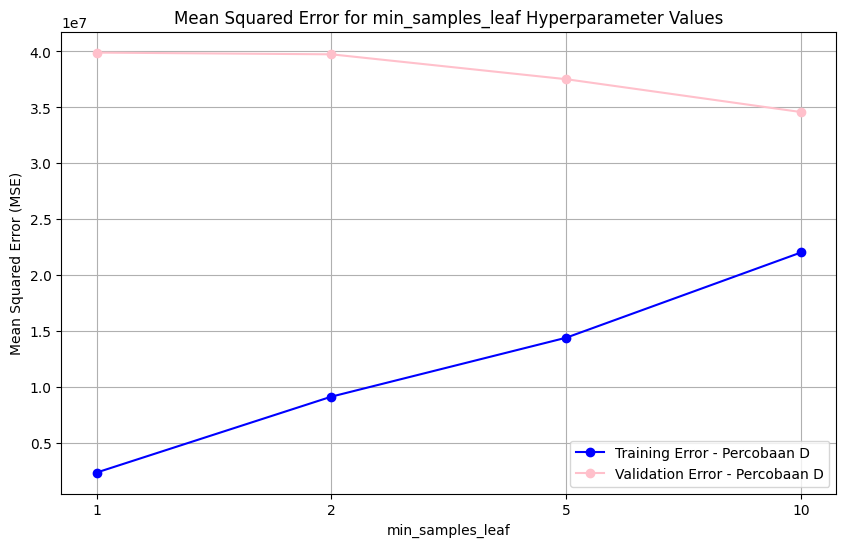

In [ ]:
# Convert None to string for plotting
leaf_values_str = [str(v) for v in leaf_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(leaf_values_str, train_mse_results_d, marker='o', linestyle='-', color='blue', label='Training Error - Percobaan D')
plt.plot(leaf_values_str, validation_mse_results_d, marker='o', linestyle='-', color='pink', label='Validation Error - Percobaan D')
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error for min_samples_leaf Hyperparameter Values')
plt.legend()
plt.grid(True)
plt.show()

**5. Percobaan E - Maximum Features**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_mse_results_e = []
validation_mse_results_e = []

feature_values = [None, 'sqrt', 'log2', 0.5]  # None berarti menggunakan semua fitur

for feature in feature_values:
    model_e = DecisionTreeRegressor(max_features=feature, random_state=42)
    model_e.fit(X_train, y_train)

    y_train_pred_e = model_e.predict(X_train)
    y_test_pred_e = model_e.predict(X_test)

    train_mse_e = mean_squared_error(y_train, y_train_pred_e)
    validation_mse_e = mean_squared_error(y_test, y_test_pred_e)

    train_mse_results_e.append(train_mse_e)
    validation_mse_results_e.append(validation_mse_e)

    print(f'Mean Squared Error (Percobaan E, max_features={feature} - Training): {train_mse_e}')
    print(f'Mean Squared Error (Percobaan E, max_features={feature} - Validation): {validation_mse_e}')

Mean Squared Error (Percobaan E, max_features=None - Training): 2322584.74360929
Mean Squared Error (Percobaan E, max_features=None - Validation): 39898415.31165312
Mean Squared Error (Percobaan E, max_features=sqrt - Training): 2322584.74360929
Mean Squared Error (Percobaan E, max_features=sqrt - Validation): 106933340.78590785
Mean Squared Error (Percobaan E, max_features=log2 - Training): 2322584.74360929
Mean Squared Error (Percobaan E, max_features=log2 - Validation): 106933340.78590785
Mean Squared Error (Percobaan E, max_features=0.5 - Training): 2322584.74360929
Mean Squared Error (Percobaan E, max_features=0.5 - Validation): 44923500.0


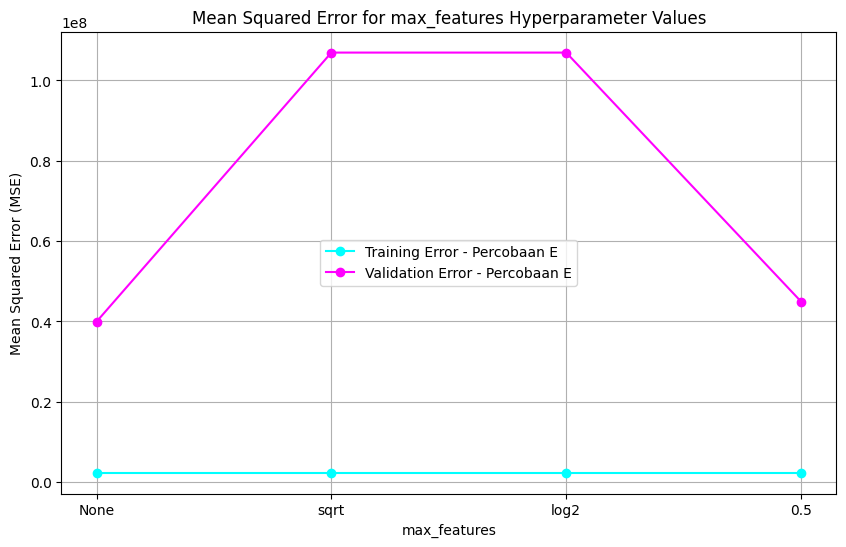

In [ ]:
# Convert None to string for plotting
feature_values_str = ['None' if v is None else str(v) for v in feature_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(feature_values_str, train_mse_results_e, marker='o', linestyle='-', color='cyan', label='Training Error - Percobaan E')
plt.plot(feature_values_str, validation_mse_results_e, marker='o', linestyle='-', color='magenta', label='Validation Error - Percobaan E')
plt.xlabel('max_features')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error for max_features Hyperparameter Values')
plt.legend()
plt.grid(True)
plt.show()

**6. Percobaan F - Combination of Hyperparameters**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_mse_results_f = []
validation_mse_results_f = []

combinations = [
    {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
]

for combo in combinations:
    model_f = DecisionTreeRegressor(
        max_depth=combo['max_depth'],
        min_samples_split=combo['min_samples_split'],
        min_samples_leaf=combo['min_samples_leaf'],
        random_state=42
    )
    model_f.fit(X_train, y_train)

    y_train_pred_f = model_f.predict(X_train)
    y_test_pred_f = model_f.predict(X_test)

    train_mse_f = mean_squared_error(y_train, y_train_pred_f)
    validation_mse_f = mean_squared_error(y_test, y_test_pred_f)

    train_mse_results_f.append(train_mse_f)
    validation_mse_results_f.append(validation_mse_f)

    print(f'Mean Squared Error (Percobaan F, {combo} - Training): {train_mse_f}')
    print(f'Mean Squared Error (Percobaan F, {combo} - Validation): {validation_mse_f}')

Mean Squared Error (Percobaan F, {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5} - Training): 18584197.847134486
Mean Squared Error (Percobaan F, {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5} - Validation): 36748489.568074346
Mean Squared Error (Percobaan F, {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2} - Training): 14295144.995667728
Mean Squared Error (Percobaan F, {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2} - Validation): 32160718.216865838
Mean Squared Error (Percobaan F, {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1} - Training): 2322584.74360929
Mean Squared Error (Percobaan F, {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1} - Validation): 39898415.31165312


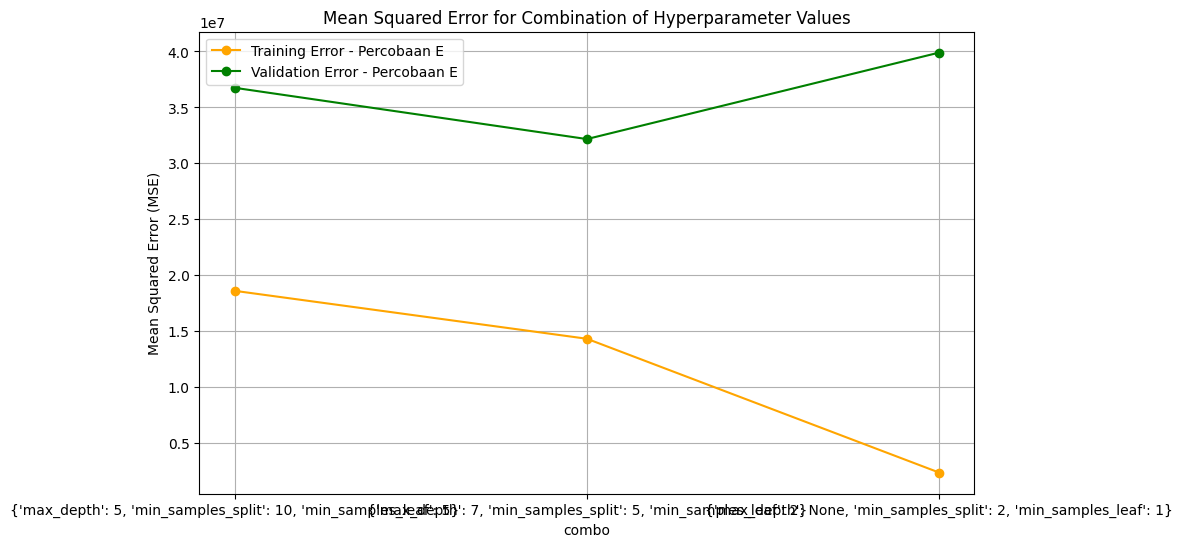

In [ ]:
# Convert None to string for plotting
combo_values_str = [str(combo) for combo in combinations]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(combo_values_str, train_mse_results_f, marker='o', linestyle='-', color='orange', label='Training Error - Percobaan E')
plt.plot(combo_values_str, validation_mse_results_f, marker='o', linestyle='-', color='green', label='Validation Error - Percobaan E')
plt.xlabel('combo')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error for Combination of Hyperparameter Values')
plt.legend()
plt.grid(True)
plt.show()

# **Evaluation Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth' : [3, 5, 7, 10, None],
    'min_samples_split' : [2, 5, 10, 20],
    'min_samples_leaf' : [1, 2, 5, 10],
    'max_features' : [None, 'sqrt', 'log2', 0.5]
}

# Initialize DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# Predict on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error: 28705852.982778423
Mean Absolute Error: 922.8817371721326
R^2 Score: 0.982767931628577


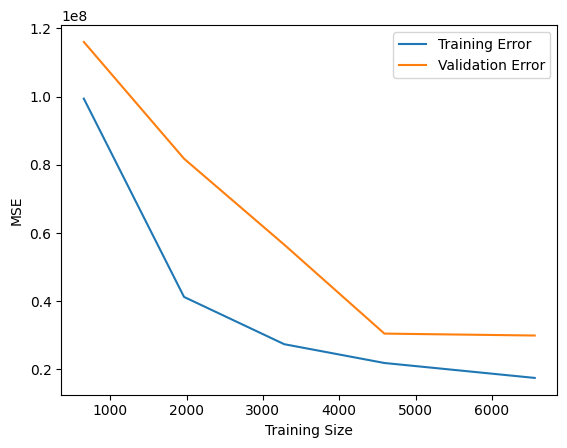

In [ ]:
# Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0])
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Validation Error')
plt.ylabel('MSE')
plt.xlabel('Training Size')
plt.legend()
plt.show()

# **Deployment**

**Streamlit**

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
import joblib

# Assuming 'grid_search' is the GridSearchCV object used for tuning
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'best_decision_tree_model.pkl')

['best_decision_tree_model.pkl']

In [ ]:
import joblib
import numpy as np
import streamlit as st

# Load the trained model
model = joblib.load('best_decision_tree_model.pkl')

# Streamlit UI
st.title('Revenue Growth Prediction')

# Input features
features_input = st.text_input('Input features (comma separated):')
features = [float(x) for x in features_input.split(',')] if features_input else []

if st.button('Predict'):
    if features:
        prediction = model.predict([features])
        st.write(f'Prediction: {prediction[0]}')
    else:
        st.write('Please input features')

2024-05-25 16:34:14.390 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-05-25 16:34:14.393 Session state does not function when running a script without `streamlit run`
